In [1]:
import matplotlib
#matplotlib.use('TKagg')
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import json 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def json_load(filename):
   with open(filename) as f_in:
       return(json.load(f_in)["mean"]["point_estimate"])

In [3]:
def load_files(dirname):
    folders = os.listdir(dirname)
    #print(folders)
    csv_files = list(map(lambda name: os.path.join(os.path.join(dirname, name),'new/raw.csv'), folders))

    #print(csv_files)


    df_from_each_file = (pd.read_csv(f, sep=',') for f in csv_files)
    #print(list(df_from_each_file))
    df_from_each_file = (f.head(1) for f in df_from_each_file)
    #print(list(df_from_each_file))
    return df_from_each_file
dirname = './benchmarks_schedulers/parallel_speculative_iter'
df_from_each_file = list(load_files(dirname)) 


In [4]:
df_merged   = pd.concat(df_from_each_file, ignore_index=True)

del df_merged["group"]
del df_merged["throughput_type"]
del df_merged["sample_measured_value"]
del df_merged["unit"]
del df_merged["iteration_count"]



In [5]:
folders = df_merged['value']
df_merged["time"] = list(map(lambda name: json_load(os.path.join(os.path.join(dirname, name),'new/estimates.json')), folders))



In [6]:

time = df_merged['time']
value = df_merged['value']

In [7]:
def size_calculation(value):
    element_size = int(value.split("-")[0])
    vector_size = int(value.split("-")[1])
    matrixs_size =  (((32 * element_size * element_size) * 3) * 2) * vector_size
    #normal_elements_size = ((6 * 32 * 1000) + (2 * 32 * 1000) + (6 * 32)) * vector_size
   
    return matrixs_size /8

In [8]:
#df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(throughput_num, time))))
#df_merged['size'] = list(map(lambda value: value/(1024**2), throughput_num))
#df_merged['time'] = list(map(lambda value: value/1000000, time))
#df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
#df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))



del df_merged["throughput_num"]
df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))
df_merged["throughput_num"] = list(map(lambda v: size_calculation(v), value))
df_merged['time'] = list(map(lambda value: value/1000000, time))
df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(df_merged["throughput_num"], df_merged['time']))))
df_merged['size'] = list(map(lambda value: value/(1024**2), df_merged["throughput_num"]))




In [9]:
a = df_merged.sort_values(by=["size"], ascending=False)
b = df_merged.sort_values(by=["time"], ascending=True)
#a.to_csv( "merged.csv")
#b.to_csv( "merged2.csv")


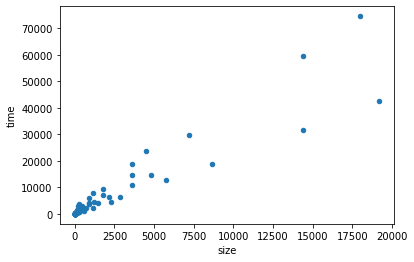

In [10]:

a.plot(x='size', y='time', kind = 'scatter')
plt.show()

<AxesSubplot:xlabel='size'>

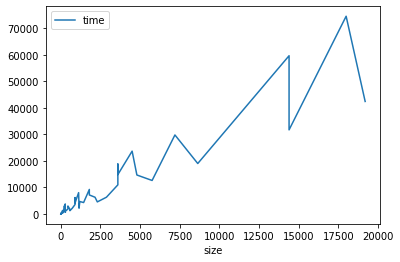

In [11]:
a.plot(x='size', y="time")

<AxesSubplot:xlabel='size', ylabel='time'>

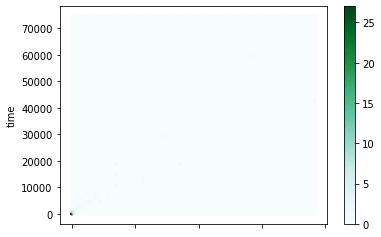

In [12]:
a.plot(x='size', y="time", kind='hexbin')

<AxesSubplot:xlabel='time', ylabel='size'>

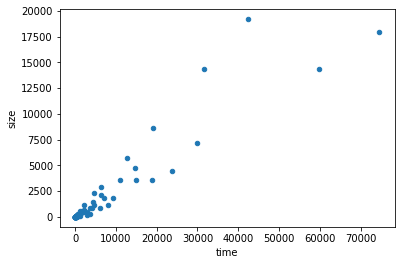

In [13]:
a.plot(x='time', y='size', kind = 'scatter')

<AxesSubplot:xlabel='time'>

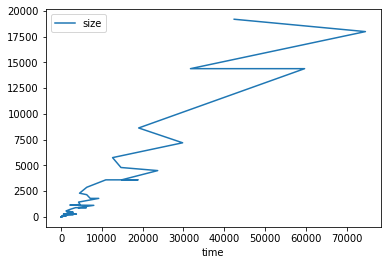

In [14]:
a.plot(x='time', y='size')


In [15]:
a

,function,value,time,element_size,vector_size,throughput_num,throughput,size
9,parallel_speculative_iter,1024-800,42438.332141,1024,800,2.013266e+10,474397.983712,19200.00000
59,parallel_speculative_iter,256-12000,74592.202386,256,12000,1.887437e+10,253034.062491,18000.00000
27,parallel_speculative_iter,1024-600,31721.193314,1024,600,1.509949e+10,476006.506143,14400.00000
21,parallel_speculative_iter,256-9600,59690.249825,256,9600,1.509949e+10,252964.168257,14400.00000
46,parallel_speculative_iter,1024-360,19026.060762,1024,360,9.059697e+09,476173.010966,8640.00000
...,...,...,...,...,...,...,...,...
17,parallel_speculative_iter,64-24,14.914999,64,24,2.359296e+06,158182.778371,2.25000
10,parallel_speculative_iter,32-48,16.439625,32,48,1.179648e+06,71756.383460,1.12500
45,parallel_speculative_iter,64-12,7.405174,64,12,1.179648e+06,159300.506826,1.12500
57,parallel_speculative_iter,32-24,8.190724,32,24,5.898240e+05,72011.212701,0.56250


In [16]:
b.loc[b['time']  > 500 ]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
68,parallel_speculative_iter,256-96,558.245513,256,96,1.509949e+08,270481.249950,144.00
73,parallel_speculative_iter,128-360,608.524187,128,360,1.415578e+08,232624.706035,135.00
42,parallel_speculative_iter,32-2400,610.240646,32,2400,5.898240e+07,96654.328709,56.25
67,parallel_speculative_iter,1024-12,620.133647,1024,12,3.019899e+08,486975.492158,288.00
22,parallel_speculative_iter,64-1200,670.504552,64,1200,1.179648e+08,175934.376189,112.50
13,parallel_speculative_iter,256-120,677.127983,256,120,1.887437e+08,278741.515415,180.00
38,parallel_speculative_iter,512-48,846.059444,512,48,3.019899e+08,356936.962415,288.00
43,parallel_speculative_iter,128-600,986.641599,128,600,2.359296e+08,239123.913096,225.00
2,parallel_speculative_iter,64-2400,1084.422936,64,2400,2.359296e+08,217562.347893,225.00
37,parallel_speculative_iter,1024-24,1224.561439,1024,24,6.039798e+08,493221.292794,576.00


In [17]:
b

,function,value,time,element_size,vector_size,throughput_num,throughput,size
55,parallel_speculative_iter,32-12,4.123121,32,12,2.949120e+05,71526.391790,0.28125
45,parallel_speculative_iter,64-12,7.405174,64,12,1.179648e+06,159300.506826,1.12500
57,parallel_speculative_iter,32-24,8.190724,32,24,5.898240e+05,72011.212701,0.56250
17,parallel_speculative_iter,64-24,14.914999,64,24,2.359296e+06,158182.778371,2.25000
10,parallel_speculative_iter,32-48,16.439625,32,48,1.179648e+06,71756.383460,1.12500
...,...,...,...,...,...,...,...,...
1,parallel_speculative_iter,256-4800,29798.233008,256,4800,7.549747e+09,253362.244596,7200.00000
27,parallel_speculative_iter,1024-600,31721.193314,1024,600,1.509949e+10,476006.506143,14400.00000
9,parallel_speculative_iter,1024-800,42438.332141,1024,800,2.013266e+10,474397.983712,19200.00000
21,parallel_speculative_iter,256-9600,59690.249825,256,9600,1.509949e+10,252964.168257,14400.00000


<AxesSubplot:xlabel='time'>

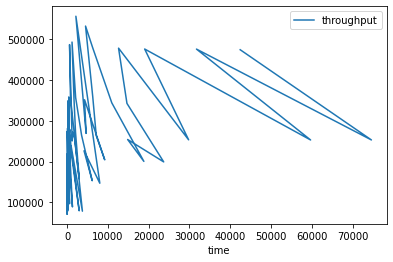

In [18]:
a.plot(x='time', y='throughput')


<AxesSubplot:xlabel='size'>

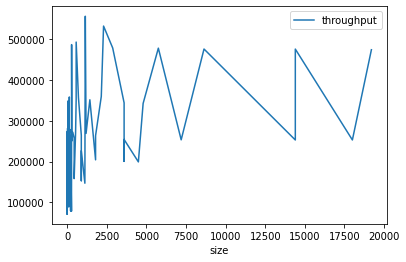

In [19]:
a.plot(x='size', y='throughput')


<AxesSubplot:xlabel='vector_size'>

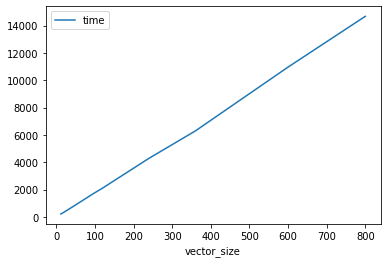

In [20]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

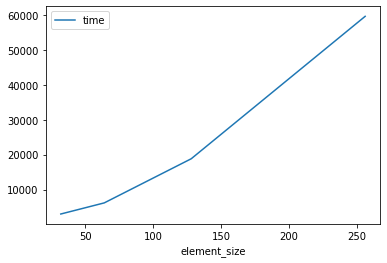

In [21]:
a[a.value.str.contains(r".*-9600")].plot(x='element_size', y='time')


<AxesSubplot:xlabel='vector_size'>

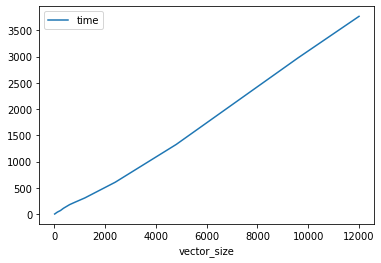

In [22]:
a[a.value.str.contains(r"^32")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

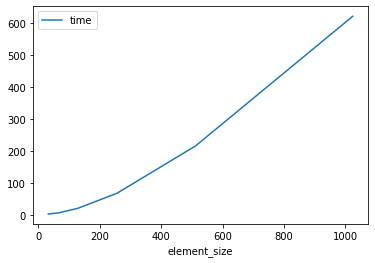

In [23]:
a[a.value.str.contains(r".*-12$")].plot(x='element_size', y='time')


In [24]:
a[a.value.str.contains(r".*-800$")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
9,parallel_speculative_iter,1024-800,42438.332141,1024,800,2.013266e+10,474397.983712,19200.00
69,parallel_speculative_iter,512-800,14686.771286,512,800,5.033165e+09,342700.563799,4800.00
52,parallel_speculative_iter,256-800,4676.308205,256,800,1.258291e+09,269077.901829,1200.00
48,parallel_speculative_iter,128-800,1255.322020,128,800,3.145728e+08,250591.318393,300.00
66,parallel_speculative_iter,64-800,368.386096,64,800,7.864320e+07,213480.369791,75.00
65,parallel_speculative_iter,32-800,226.276781,32,800,1.966080e+07,86888.278460,18.75


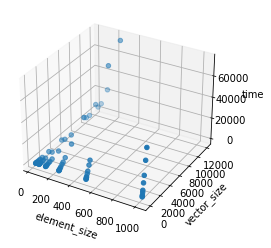

In [25]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(a['element_size'], a['vector_size'],a['time'])
threedee.set_xlabel('element_size')
threedee.set_ylabel('vector_size')
threedee.set_zlabel('time')
plt.show()

No handles with labels found to put in legend.


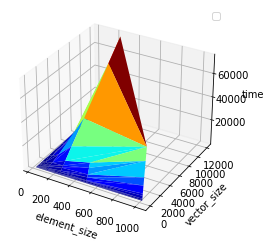

In [26]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()

ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.jet, linewidth=0.2)
plt.show()

No handles with labels found to put in legend.


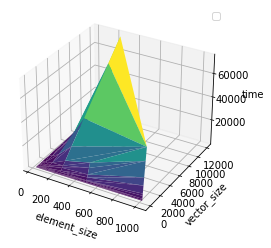

In [27]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()
plt.show()

No handles with labels found to put in legend.


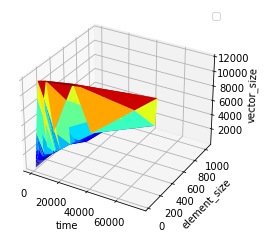

In [28]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['time'], a['element_size'],a['vector_size'], cmap=plt.cm.jet, linewidth=0.1)
ax.set_xlabel("time")
ax.set_ylabel("element_size")
ax.set_zlabel("vector_size")
ax.legend()
plt.show()

<AxesSubplot:xlabel='element_size'>

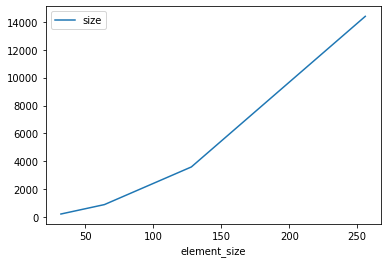

In [29]:
a[a.value.str.contains(r".*-9600")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='element_size'>

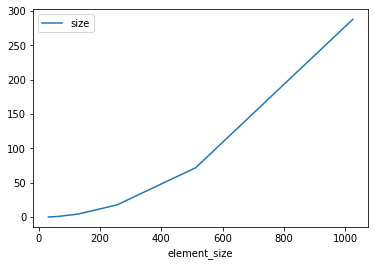

In [30]:
a[a.value.str.contains(r".*-12$")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='vector_size'>

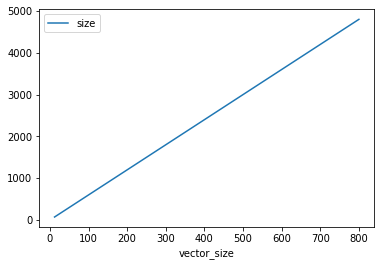

In [31]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='size')


<AxesSubplot:xlabel='vector_size'>

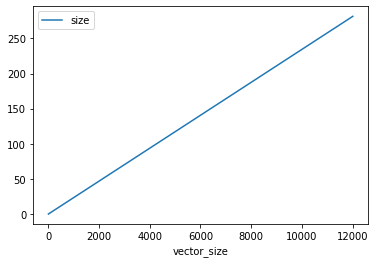

In [32]:
a[a.value.str.contains(r"^32")].plot(x='vector_size', y='size')


In [33]:
b[b.value.str.contains(r"^512")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
49,parallel_speculative_iter,512-12,216.332012,512,12,7.549747e+07,348988.905126,72.0
32,parallel_speculative_iter,512-24,421.189256,512,24,1.509949e+08,358496.665501,144.0
38,parallel_speculative_iter,512-48,846.059444,512,48,3.019899e+08,356936.962415,288.0
4,parallel_speculative_iter,512-96,1708.838967,512,96,6.039798e+08,353444.524336,576.0
12,parallel_speculative_iter,512-120,2115.263795,512,120,7.549747e+08,356917.525774,720.0
72,parallel_speculative_iter,512-240,4294.129823,512,240,1.509949e+09,351631.064347,1440.0
71,parallel_speculative_iter,512-360,6296.083174,512,360,2.264924e+09,359735.425572,2160.0
39,parallel_speculative_iter,512-600,10970.951914,512,600,3.774874e+09,344078.948630,3600.0
69,parallel_speculative_iter,512-800,14686.771286,512,800,5.033165e+09,342700.563799,4800.0
